<a href="https://colab.research.google.com/github/rijalammar1/PVCK_RijalAmmar/blob/main/Jobsheet7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np
import math
from PIL import Image as im

In [11]:
def convolution2d(image, kernel, stride, padding):

  image = np.pad(image, padding, mode='constant', constant_values=0)

  kernel_height, kernel_width = kernel.shape
  padded_height, padded_width = image.shape

  output_height = (padded_height - kernel_height) // stride + 1
  output_width = (padded_width - kernel_width) // stride + 1

  new_image = np.zeros((output_height, output_width)).astype(np.float32)

  # convolution process
  for y in range(0, output_height):
    for x in range(0, output_width):
      new_image[y][x] = np.sum(image[y * stride:y * stride + kernel_height, x * stride:x * stride + kernel_width] * kernel).astype(np.float32)
      
  return new_image

In [12]:
img = cv.imread('/content/drive/MyDrive/PVCK_MM/Images/female.tiff')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

In [13]:
# Image Sharpen
kernel_sharpen = np.array([[0,-1,0],
                           [-1,5,-1],
                           [0,-1,0]])

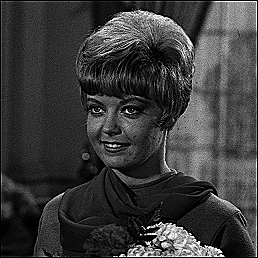

In [14]:
# Memanggil fungso konvolusi dan menerapkan setiap filter yang telah ditentukan
cv2_imshow(convolution2d(img_gray,kernel_sharpen,1,2))

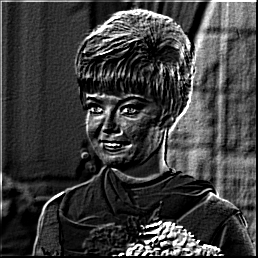

In [15]:
# Image Emboss
Emboss = np.array([[-2,-1,0],
                    [-1,1,1],
                    [0,1,2]])
cv2_imshow(convolution2d(img_gray,Emboss,1,2))

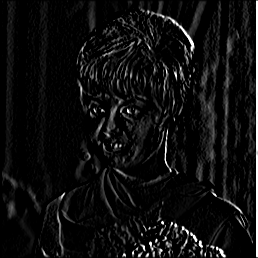

In [18]:
# Left Sobel Edge Detection
LSED = np.array([[1,0,-1],
                  [2,0,-2],
                  [1,0,-1]])
cv2_imshow(convolution2d(img_gray,LSED,1,2))

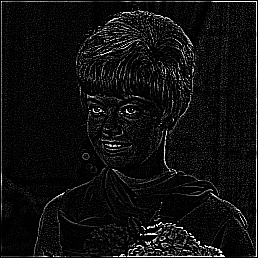

In [20]:
# Canny Edge Detection
CED = np.array([[-1,-1,-1],
                  [-1,8,-1],
                  [-1,-1,-1]])
cv2_imshow(convolution2d(img_gray,CED,1,2))

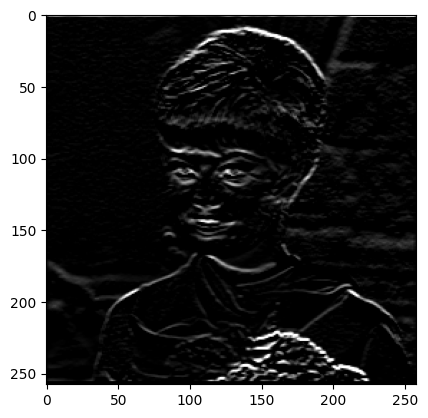

In [27]:
# Prewitt Edge Detection
kernel_prewitt = np.array([[-1,-1,-1],
                         [0,0,0],
                         [1,1,1]])

img_conv = convolution2d(img_gray, kernel_prewitt, 1, 2)
img_conv_norm = np.clip(img_conv, 0, 255).astype(np.uint8)
img_conv_norm = (img_conv_norm - np.min(img_conv_norm)) / (np.max(img_conv_norm) - np.min(img_conv_norm))
plt.imshow(img_conv_norm, cmap='gray')

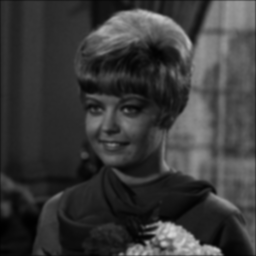

In [29]:
# 5x5 Gaussian Blur
GB = np.array([[1,4,6,4,1],
                         [4,16,24,16,4],
                         [6,24,36,24,6],
                         [4,16,24,16,4],
                         [1,4,6,4,1]])/256.0

cv2_imshow(convolution2d(img_gray, GB, 1, 2))

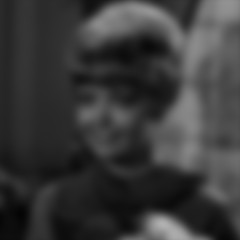

In [31]:
# 21x21 Gaussian Blur
kernel_size = 21
sigma = math.sqrt(kernel_size)
GK = cv.getGaussianKernel(kernel_size, sigma)
gauss_kernel = GK @ GK.transpose()

cv2_imshow(convolution2d(img_gray, gauss_kernel, 1, 2))